<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/MSPA2NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Simulated dataset
data = {
    'time_spent': [5.5, 12.0, 7.3, 15.2, 20.1, 4.2, 3.1, 17.0, 9.5, 14.3],
    'age_group': ['18-25', '26-35', '18-25', '36-45', '46-55', '18-25', '18-25', '26-35', '36-45', '46-55'],
    'product_viewed': ['Farm House', 'Flats', 'Housing', 'Farms', 'Flats', 'Housing', 'Farms', 'Farm House', 'Flats', 'Housing'],
    'purchased': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

df = pd.DataFrame(data)


In [3]:
# Encode categorical variables
le_age = LabelEncoder()
le_product = LabelEncoder()
le_purchase = LabelEncoder()

df['age_group'] = le_age.fit_transform(df['age_group'])
df['product_viewed_encoded'] = le_product.fit_transform(df['product_viewed'])
df['purchased'] = le_purchase.fit_transform(df['purchased'])

# Features: age, time spent, and product category
X = df[['time_spent', 'age_group', 'product_viewed_encoded']]

# Target: Whether they purchased
y = df['purchased']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

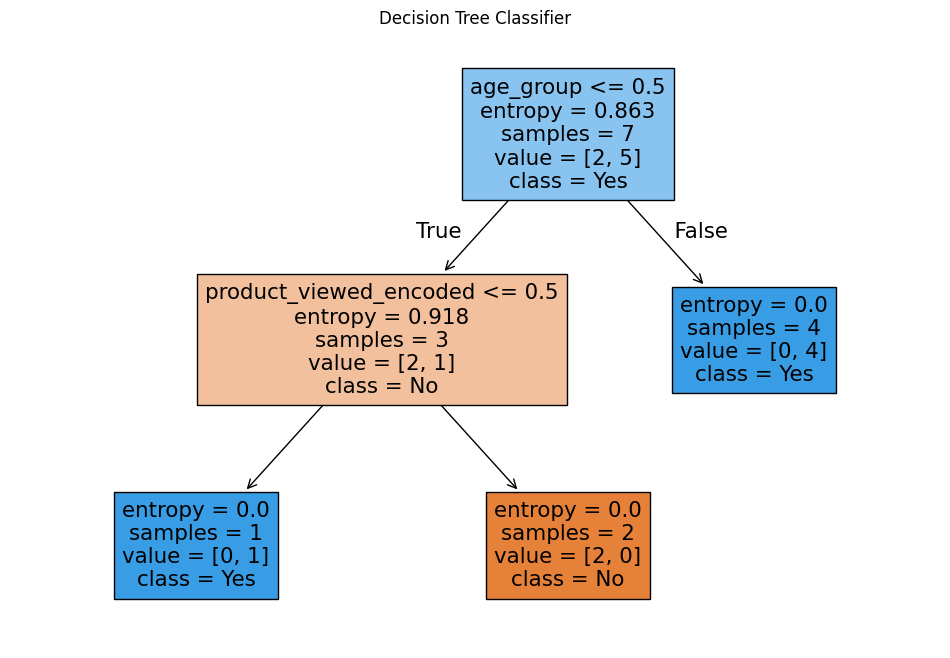

In [6]:
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()


In [7]:
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


🧩 Confusion Matrix:
 [[1 0]
 [0 2]]


In [8]:
# Filter only purchased entries
purchased_df = df[df['purchased'] == 1]

# Decode the product category names
purchased_df['product_viewed'] = le_product.inverse_transform(purchased_df['product_viewed_encoded'])

# Count the most purchased product
most_sold = purchased_df['product_viewed'].value_counts()
print("\n🏠 Most Sold Products:\n", most_sold)
print("\n🔥 Most Sold Overall:", most_sold.idxmax())



🏠 Most Sold Products:
 product_viewed
Flats         3
Farm House    2
Farms         1
Housing       1
Name: count, dtype: int64

🔥 Most Sold Overall: Flats


<ipython-input-8-ba2031e0964d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased_df['product_viewed'] = le_product.inverse_transform(purchased_df['product_viewed_encoded'])


<ipython-input-9-dfe77542b864>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_sold.index, y=most_sold.values, palette='viridis')
<ipython-input-9-dfe77542b864>:12: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


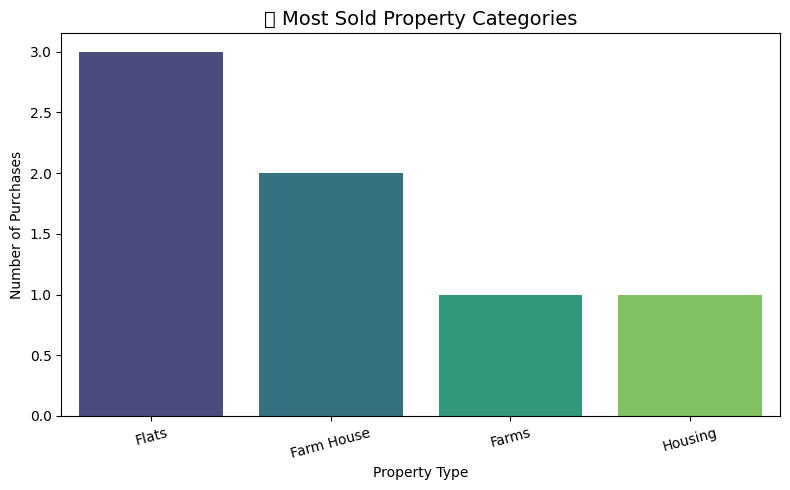

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of most sold products
plt.figure(figsize=(8, 5))
sns.barplot(x=most_sold.index, y=most_sold.values, palette='viridis')

plt.title('🏠 Most Sold Property Categories', fontsize=14)
plt.xlabel('Property Type')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
